In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('iris_with_species.csv', index_col=0,header=0)

In [4]:
x = dataset.iloc[:,1:]

In [5]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
sample1,5.1,3.5,1.4,0.2
sample2,4.9,3.0,1.4,0.2
sample3,4.7,3.2,1.3,0.2
sample4,4.6,3.1,1.5,0.2
sample5,5.0,3.6,1.4,0.2
...,...,...,...,...
sample146,6.7,3.0,5.2,2.3
sample147,6.3,2.5,5.0,1.9
sample148,6.5,3.0,5.2,2.0
sample149,6.2,3.4,5.4,2.3


In [6]:
autoscaled_x = (x-x.mean())/x.std()

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()

In [9]:
pca.fit(autoscaled_x)

PCA()

In [10]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [11]:
pca.components_.T

array([[ 0.52106591,  0.37741762, -0.71956635, -0.26128628],
       [-0.26934744,  0.92329566,  0.24438178,  0.12350962],
       [ 0.5804131 ,  0.02449161,  0.14212637,  0.80144925],
       [ 0.56485654,  0.06694199,  0.63427274, -0.52359713]])

In [12]:
loading_vectors = pd.DataFrame(pca.components_.T)

In [13]:
loading_vectors

,0,1,2,3
0,0.521066,0.377418,-0.719566,-0.261286
1,-0.269347,0.923296,0.244382,0.123510
2,0.580413,0.024492,0.142126,0.801449
3,0.564857,0.066942,0.634273,-0.523597


In [14]:
autoscaled_x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
sample1,-0.897674,1.015602,-1.335752,-1.311052
sample2,-1.139200,-0.131539,-1.335752,-1.311052
sample3,-1.380727,0.327318,-1.392399,-1.311052
sample4,-1.501490,0.097889,-1.279104,-1.311052
sample5,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
sample146,1.034539,-0.131539,0.816859,1.443994
sample147,0.551486,-1.278680,0.703564,0.919223
sample148,0.793012,-0.131539,0.816859,1.050416
sample149,0.430722,0.786174,0.930154,1.443994


In [15]:
loading_vectors.index

RangeIndex(start=0, stop=4, step=1)

In [16]:
loading_vectors.index = x.columns

In [17]:
loading_vectors.columns = ['PC1','PC2','PC3','PC4']

In [18]:
loading_vectors

,PC1,PC2,PC3,PC4
Sepal.Length,0.521066,0.377418,-0.719566,-0.261286
Sepal.Width,-0.269347,0.923296,0.244382,0.123510
Petal.Length,0.580413,0.024492,0.142126,0.801449
Petal.Width,0.564857,0.066942,0.634273,-0.523597


In [19]:
(loading_vectors ** 2).sum()

PC1    1.0
PC2    1.0
PC3    1.0
PC4    1.0
dtype: float64

In [20]:
pca.transform(autoscaled_x)

array([[-2.25714118e+00,  4.78423832e-01, -1.27279624e-01,
        -2.40875085e-02],
       [-2.07401302e+00, -6.71882687e-01, -2.33825517e-01,
        -1.02662845e-01],
       [-2.35633511e+00, -3.40766425e-01,  4.40539002e-02,
        -2.82823051e-02],
       [-2.29170679e+00, -5.95399863e-01,  9.09852971e-02,
         6.57353401e-02],
       [-2.38186270e+00,  6.44675659e-01,  1.56856473e-02,
         3.58028703e-02],
       [-2.06870061e+00,  1.48420530e+00,  2.68782498e-02,
        -6.58611612e-03],
       [-2.43586845e+00,  4.74851181e-02,  3.34350297e-01,
         3.66527670e-02],
       [-2.22539189e+00,  2.22403002e-01, -8.83993519e-02,
         2.45299187e-02],
       [-2.32684533e+00, -1.11160370e+00,  1.44592465e-01,
         2.67695403e-02],
       [-2.17703491e+00, -4.67447569e-01, -2.52918268e-01,
         3.97660677e-02],
       [-2.15907699e+00,  1.04020587e+00, -2.67784001e-01,
        -1.66755027e-02],
       [-2.31836413e+00,  1.32633999e-01,  9.34461909e-02,
      

In [21]:
score = pd.DataFrame(pca.transform(autoscaled_x))

In [22]:
score

,0,1,2,3
0,-2.257141,0.478424,-0.127280,-0.024088
1,-2.074013,-0.671883,-0.233826,-0.102663
2,-2.356335,-0.340766,0.044054,-0.028282
3,-2.291707,-0.595400,0.090985,0.065735
4,-2.381863,0.644676,0.015686,0.035803
...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957
146,1.559356,-0.893693,-0.026283,-0.219457
147,1.516091,0.268171,0.179577,-0.118773
148,1.368204,1.007878,0.930279,-0.026041


In [23]:
score.index = x.index

In [24]:
score

,0,1,2,3
sample1,-2.257141,0.478424,-0.127280,-0.024088
sample2,-2.074013,-0.671883,-0.233826,-0.102663
sample3,-2.356335,-0.340766,0.044054,-0.028282
sample4,-2.291707,-0.595400,0.090985,0.065735
sample5,-2.381863,0.644676,0.015686,0.035803
...,...,...,...,...
sample146,1.864258,0.385674,0.255418,-0.387957
sample147,1.559356,-0.893693,-0.026283,-0.219457
sample148,1.516091,0.268171,0.179577,-0.118773
sample149,1.368204,1.007878,0.930279,-0.026041


In [26]:
score.corr()

,0,1,2,3
0,1.000000e+00,-3.869223e-17,-1.653148e-15,-4.386540e-16
1,-3.869223e-17,1.000000e+00,-6.320744e-16,1.122778e-16
2,-1.653148e-15,-6.320744e-16,1.000000e+00,-2.162240e-16
3,-4.386540e-16,1.122778e-16,-2.162240e-16,1.000000e+00


In [27]:
score

,0,1,2,3
sample1,-2.257141,0.478424,-0.127280,-0.024088
sample2,-2.074013,-0.671883,-0.233826,-0.102663
sample3,-2.356335,-0.340766,0.044054,-0.028282
sample4,-2.291707,-0.595400,0.090985,0.065735
sample5,-2.381863,0.644676,0.015686,0.035803
...,...,...,...,...
sample146,1.864258,0.385674,0.255418,-0.387957
sample147,1.559356,-0.893693,-0.026283,-0.219457
sample148,1.516091,0.268171,0.179577,-0.118773
sample149,1.368204,1.007878,0.930279,-0.026041


In [29]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [32]:
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)

In [33]:
contribution_ratios.cumsum()

,0
0,0.729624
1,0.958132
2,0.994821
3,1.000000


In [34]:
import matplotlib.pyplot as plt

In [35]:
x_axis = range(1,contribution_ratios.shape[0]+1)

In [36]:
x_axis

range(1, 5)

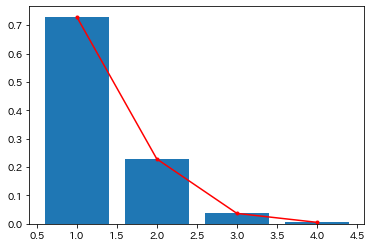

In [40]:
plt.bar(x_axis,contribution_ratios.iloc[:,0],align='center')
plt.plot(x_axis, contribution_ratios.iloc[:, 0], 'r.-') 

In [41]:
import pandas as pd

In [42]:
dataset = pd.read_csv('descriptors_8_with_boiling_point.csv', index_col=0,header=0)

In [43]:
dataset

,BoilingPoint,MolWt,HeavyAtomMolWt,NumValenceElectrons,HeavyAtomCount,NOCount,NumHeteroatoms,NumRotatableBonds,RingCount
C=CC#N,350.5,53.064,50.040,20,4,1,1,0,0
C=CC=O,325.8,56.064,52.032,22,4,1,1,1,0
C=CC(=O)O,414.2,72.063,68.031,28,5,2,2,1,0
C=CCCl,318.1,76.526,71.486,24,4,0,1,1,0
C=CC,225.4,42.081,36.033,18,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...
CCCCCCCCCCCCCCCC,560.0,226.448,192.176,98,16,0,0,13,0
CC(C)Br,332.6,122.993,115.937,26,4,0,1,0,0
CC(C)(C)Cl,323.8,92.569,83.497,32,5,0,1,0,0
Cc1ccncc1,418.5,93.129,86.073,36,7,1,1,0,1


In [45]:
dataset.shape

(294, 9)

In [46]:
dataset.columns

Index(['BoilingPoint', 'MolWt', 'HeavyAtomMolWt', 'NumValenceElectrons',
       'HeavyAtomCount', 'NOCount', 'NumHeteroatoms', 'NumRotatableBonds',
       'RingCount'],
      dtype='object')

In [48]:
dataset.iloc[:,1:]

,MolWt,HeavyAtomMolWt,NumValenceElectrons,HeavyAtomCount,NOCount,NumHeteroatoms,NumRotatableBonds,RingCount
C=CC#N,53.064,50.040,20,4,1,1,0,0
C=CC=O,56.064,52.032,22,4,1,1,1,0
C=CC(=O)O,72.063,68.031,28,5,2,2,1,0
C=CCCl,76.526,71.486,24,4,0,1,1,0
C=CC,42.081,36.033,18,3,0,0,0,0
...,...,...,...,...,...,...,...,...
CCCCCCCCCCCCCCCC,226.448,192.176,98,16,0,0,13,0
CC(C)Br,122.993,115.937,26,4,0,1,0,0
CC(C)(C)Cl,92.569,83.497,32,5,0,1,0,0
Cc1ccncc1,93.129,86.073,36,7,1,1,0,1


In [49]:
x = dataset.iloc[:,1:]

In [52]:
autoscaled_x = (x-x.mean()) / x.std()

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA()

In [55]:
pca.fit(autoscaled_x)

PCA()

In [56]:
loading_vectors = pd.DataFrame(pca.components_.T)

In [57]:
loading_vectors

,0,1,2,3,4,5,6,7
0,0.444827,-0.115299,0.013838,0.341243,0.069057,0.237157,0.354122,0.696981
1,0.442548,-0.091381,0.079990,0.443176,-0.002387,0.444644,-0.087864,-0.622545
2,0.442589,-0.123420,-0.070922,-0.195638,0.334228,-0.566651,0.478682,-0.289207
3,0.440331,-0.148181,0.071043,-0.210660,0.295101,-0.137097,-0.766556,0.203070
4,0.194073,0.631751,0.229878,-0.515562,0.207398,0.421799,0.153199,-0.013406
5,0.185348,0.644954,0.220485,0.411030,-0.299608,-0.472889,-0.130924,0.039893
6,0.374029,-0.017439,-0.484976,-0.346507,-0.708553,0.047971,-0.013295,-0.001683
7,0.067733,-0.354664,0.804160,-0.222889,-0.402002,-0.048161,0.096669,-0.001636


In [58]:
loading_vectors.index = autoscaled_x.columns

In [59]:
score = pd.DataFrame(pca.transform(autoscaled_x))

In [60]:
score

,0,1,2,3,4,5,6,7
0,-2.396959,1.022012,-0.166423,-0.122614,-0.061613,0.105068,-0.164266,0.012461
1,-2.176726,0.991088,-0.327394,-0.212242,-0.252798,0.097862,-0.098522,-0.003177
2,-1.148181,2.257715,0.210963,-0.154157,-0.140407,0.071026,-0.062624,-0.003002
3,-1.933083,0.180317,-0.545910,0.705496,-0.417635,-0.111677,-0.099895,-0.001730
4,-3.260435,-0.288111,-0.714433,-0.162900,-0.095342,0.059291,-0.063389,-0.002578
...,...,...,...,...,...,...,...,...
289,5.436661,-2.285776,-2.433079,-0.201832,-0.253425,-0.015871,0.026093,0.001405
290,-1.069053,-0.045053,-0.293728,1.631214,-0.082668,0.540731,0.222547,0.003219
291,-1.446433,0.021174,-0.368009,0.923430,0.068285,-0.194692,-0.022774,-0.000119
292,-0.709579,-0.073994,1.449730,-0.209375,-0.216621,0.010399,-0.028823,0.011641


In [61]:
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)

In [62]:
contribution_ratios

,0
0,0.605314
1,0.224103
2,0.141653
3,0.017356
4,0.009652
5,0.001300
6,0.000619
7,0.000004


In [63]:
import matplotlib.pyplot as plt

In [66]:
cumulative_contribution_ratios = contribution_ratios.cumsum() 

In [64]:
x_axis = range(1, contribution_ratios.shape[0]+1)

In [65]:
x_axis

range(1, 9)

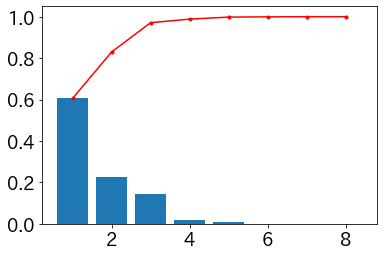

In [67]:
plt.rcParams['font.size'] = 18
plt.bar(x_axis, contribution_ratios.iloc[:,0],align='center')
plt.plot(x_axis,cumulative_contribution_ratios.iloc[:,0],'r.-')

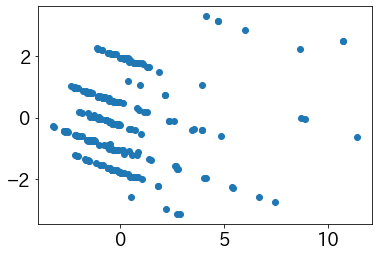

In [68]:
plt.rcParams['font.size']=18
plt.scatter(score.iloc[:,0],score.iloc[:,1])
plt.show()

In [69]:
boiling_point = dataset.iloc[:,0]

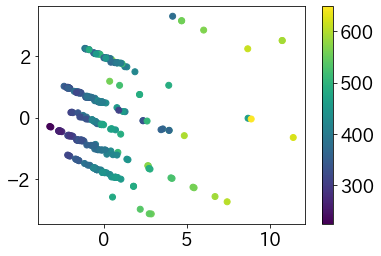

In [71]:
plt.scatter(score.iloc[:,0],score.iloc[:,1],c=boiling_point)
plt.colorbar()
plt.show()